In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
dataX=np.load('Facial expression.npy')
dataY=np.load('Facial expression label.npy')
print(dataX.shape,dataY.shape)

(19950, 48, 48, 3) (19950, 4)


In [7]:
Name=['Angry','Happy','Neutral','Surprise']
N=list(range(len(Name)))   
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 
print(normal_mapping)

{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Surprise': 3}


#### dataY2=[]
for y in tqdm(dataY):
    dataY2+=[list(y).index(1)]
print(dataY2[0:5])

In [9]:
m=len(dataX)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

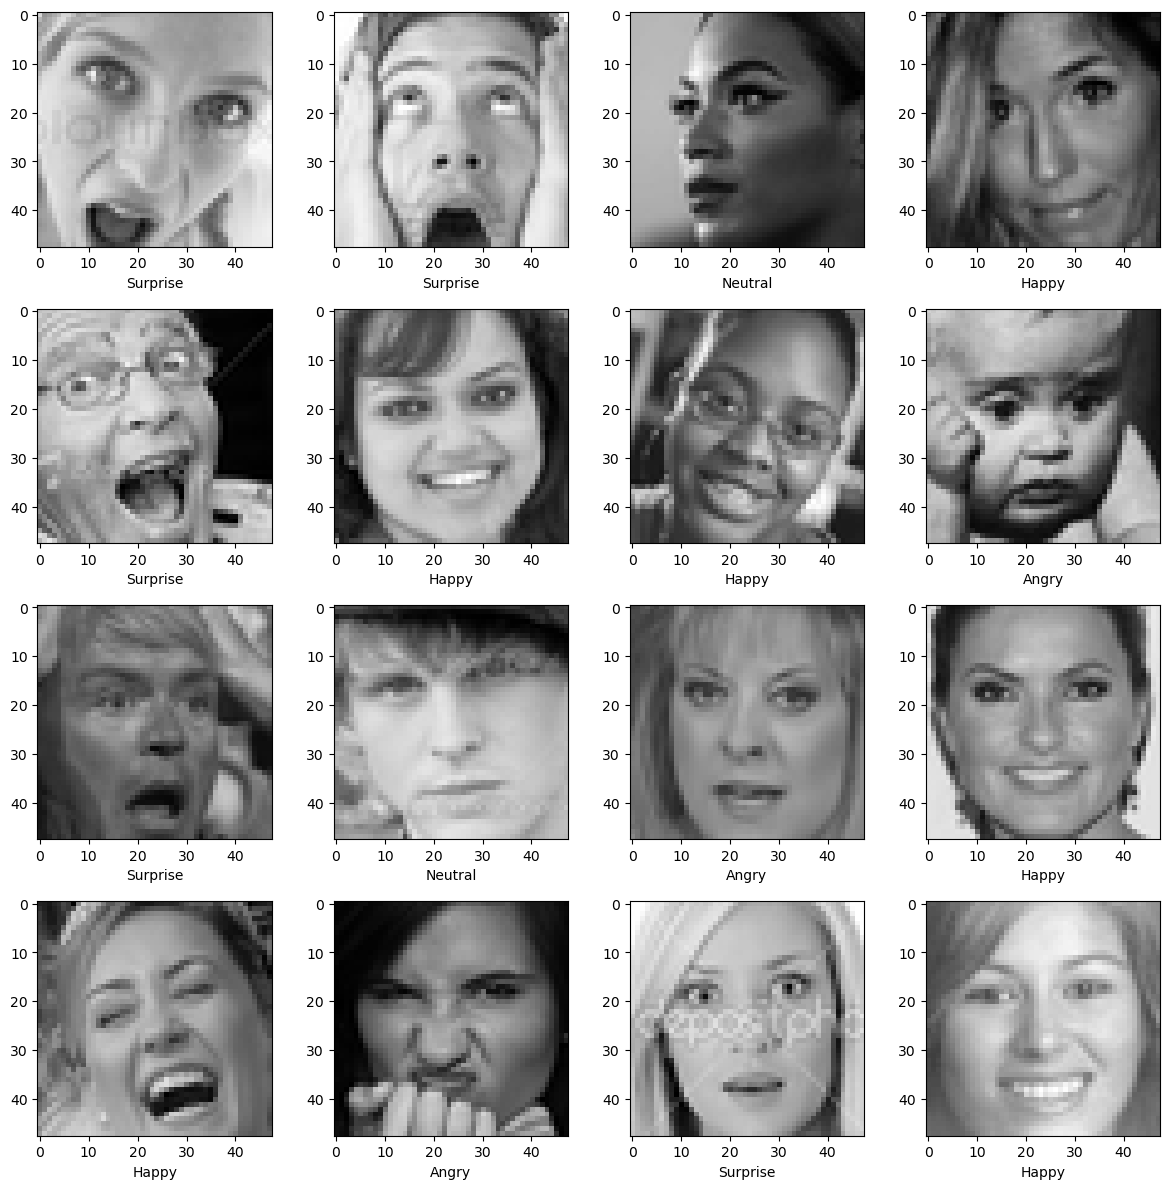

In [11]:
plt.subplots(4,4, figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xlabel(reverse_mapping[dataY2[i]])
    plt.imshow(dataX[i])
plt.tight_layout()
plt.show()

In [12]:
trainX=dataX[M[0:4*(m//5)]]
testX=dataX[M[4*(m//5):]]
trainY=dataY[M[0:4*(m//5)]]
testY=dataY[M[4*(m//5):]]

In [13]:
trainx,testx,trainy,testy=train_test_split(trainX,trainY,test_size=0.2,random_state=44)

In [14]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [15]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(48,48,3),include_top=False,
                        weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 17s 0us/step


In [16]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(len(Name), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=5)

Epoch 1/5
399/399 [==============================] - 84s 210ms/step - loss: 1.2317 - accuracy: 0.4417 - val_loss: 1.1946 - val_accuracy: 0.4659
Epoch 2/5
399/399 [==============================] - 86s 215ms/step - loss: 1.2305 - accuracy: 0.4410 - val_loss: 1.1935 - val_accuracy: 0.4630
Epoch 3/5
399/399 [==============================] - 83s 207ms/step - loss: 1.2307 - accuracy: 0.4397 - val_loss: 1.1983 - val_accuracy: 0.4599
Epoch 4/5
399/399 [==============================] - 84s 210ms/step - loss: 1.2198 - accuracy: 0.4509 - val_loss: 1.2778 - val_accuracy: 0.4258
Epoch 5/5
399/399 [==============================] - 90s 225ms/step - loss: 1.2212 - accuracy: 0.4501 - val_loss: 1.1971 - val_accuracy: 0.4568


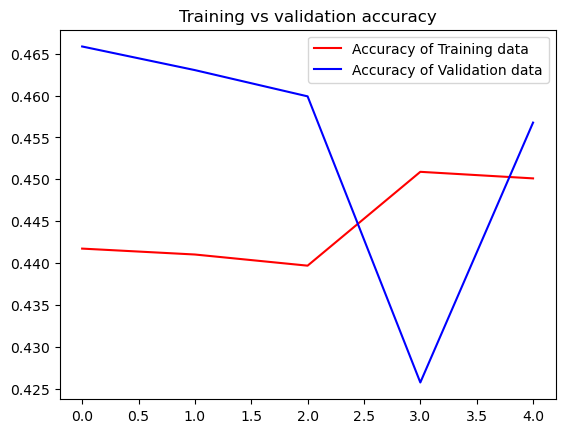

<Figure size 640x480 with 0 Axes>

In [21]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

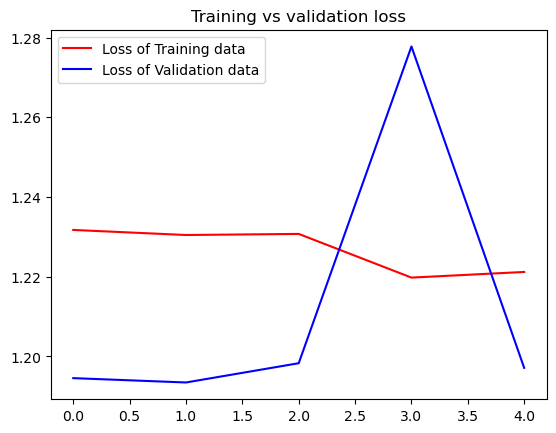

<Figure size 640x480 with 0 Axes>

In [22]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [23]:
y_pred=model.predict(testX)
pred=np.argmax(y_pred,axis=1)
actual= np.argmax(testY,axis=1)
print(classification_report(actual,pred,target_names=Name))

125/125 [==============================] - 26s 175ms/step
              precision    recall  f1-score   support

       Angry       0.40      0.05      0.08       758
       Happy       0.46      0.85      0.59      1455
     Neutral       0.47      0.28      0.35      1033
    Surprise       0.56      0.43      0.49       744

    accuracy                           0.47      3990
   macro avg       0.47      0.40      0.38      3990
weighted avg       0.47      0.47      0.41      3990

